In [1]:
import numpy as np

In [32]:
import pandas as pd
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('ma_lga_12345.csv')

In [5]:
df

,saledate,MA,type,bedrooms
0,30/09/2007,441854,house,2
1,31/12/2007,441854,house,2
2,31/03/2008,441854,house,2
3,30/06/2008,441854,house,2
4,30/09/2008,451583,house,2
...,...,...,...,...
342,30/09/2018,603281,unit,3
343,31/12/2018,601167,unit,3
344,31/03/2019,605637,unit,3
345,30/06/2019,599339,unit,3


In [69]:
df1 = pd.read_csv('raw_sales.csv')

In [70]:
df1

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,house,4
1,2007-02-27 00:00:00,2906,290000,house,3
2,2007-03-07 00:00:00,2905,328000,house,3
3,2007-03-09 00:00:00,2905,380000,house,4
4,2007-03-21 00:00:00,2906,310000,house,3
...,...,...,...,...,...
29575,2019-07-25 00:00:00,2900,500000,unit,3
29576,2019-07-25 00:00:00,2612,560000,unit,2
29577,2019-07-26 00:00:00,2912,464950,unit,2
29578,2019-07-26 00:00:00,2601,589000,unit,2


In [71]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29580 entries, 0 to 29579
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   datesold      29580 non-null  object
 1   postcode      29580 non-null  int64 
 2   price         29580 non-null  int64 
 3   propertyType  29580 non-null  object
 4   bedrooms      29580 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


**Checing Non-Null value**

In [72]:
df1.isna().sum()

,0
datesold,0
postcode,0
price,0
propertyType,0
bedrooms,0


In [73]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import scipy.stats as stats
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import FunctionTransformer


In [95]:
log_transformer = FunctionTransformer(np.log1p, validate=True)
df1['price'] = log_transformer.transform(df1[['price']])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


In [96]:
X = df1.drop(columns=['price'],axis =1)
y = df1['price']

In [97]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 2)

**Probability Density Function**

((array([-4.07073327, -3.85920197, -3.74364437, ...,  3.74364437,
          3.85920197,  4.07073327]),
  array([10.94201362, 11.03490579, 11.14187628, ..., 15.68423122,
         15.80338504, 15.89495222])),
 (np.float64(0.3717830551179651),
  np.float64(13.244697387612867),
  np.float64(0.9907417023942872)))

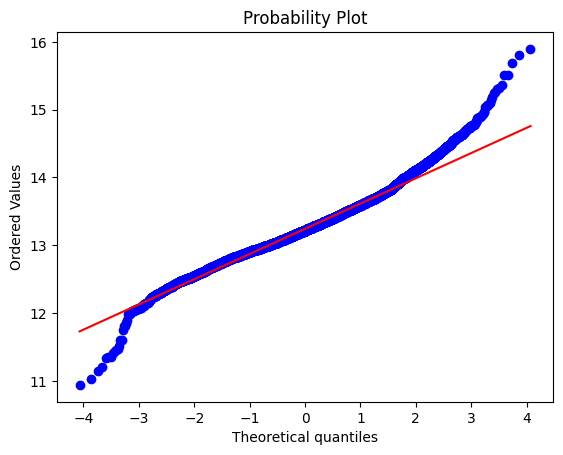

In [98]:
stats.probplot(df1['price'],dist='norm',plot=plt)


<Axes: xlabel='price', ylabel='Count'>

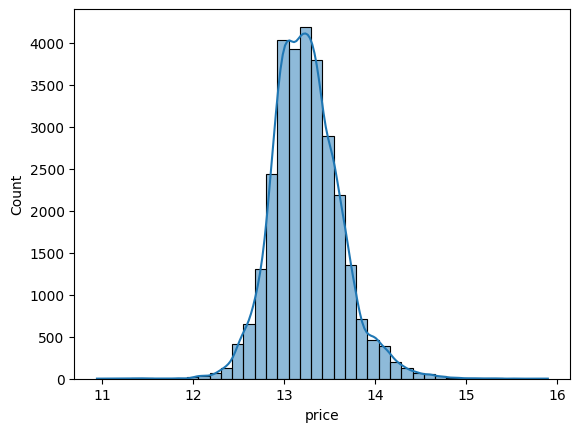

In [99]:
sns.histplot(x=df1['price'], kde=True,bins=40)

In [100]:
categorical_col = ['datesold','postcode','propertyType']
num_col = ['bedrooms']

In [101]:
preprocessor = ColumnTransformer([
    ('one_hot_encoding', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_col),
    ('scaler', StandardScaler(), num_col)
], remainder='passthrough')

In [102]:
pipe = Pipeline([
    ('preprocessor',preprocessor),

    ('model',LinearRegression())
])

In [103]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_encoding',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['datesold', 'postcode',
                                                   'propertyType']),
                                                 ('scaler', StandardScaler(),
                                                  ['bedrooms'])])),
                ('model', LinearRegression())])

In [104]:
y_pred = pipe.predict(X_test)

In [105]:
r2 = r2_score(y_test,y_pred)

In [106]:
r2

0.6622473520019061